<a href="https://colab.research.google.com/github/Ash2809/CIFAR-Classification/blob/main/CIFAR_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cifar10-pngs-in-folders:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F118250%2F283795%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240721%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240721T053847Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dbbb7d8a57e2f6ef27daa20088801e85e743e5909dc8d238440b503e81e5099887f08fe612d2c5c0274c6089d3d3708c2a9e78743099c17c5b3081e980e67891bfc94f27f3a5e8be3bf48dbbea55949dd8563e63d53716a73bb61242165cb43722831d383848582602eaed550e2d51a947d59223ee31612da6c4a593c768697fffc73b4283dc30f32be9d1db3d1cef19b0a72fcd8c03a86123a1a5e4eb6d8cd50aa23b06403ec0d996f2e1591b87a4a197ef46bc5ec9e14a103e96087b5720480c5cd151116ba3c98ba008f0401b293459f0ff444a20aafbf300113a0e88cc5735ce952c0a9741807545983c7a91448ff26a20ea5ec22208e425f6939fdc9170d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar10-pngs-in-folders/cifar10/cifar10/test/airplane/0566.png
/kaggle/input/cifar10-pngs-in-folders/cifar10/cifar10/test/airplane/0115.png
/kaggle/input/cifar10-pngs-in-folders/cifar10/cifar10/test/airplane/0050.png
/kaggle/input/cifar10-pngs-in-folders/cifar10/cifar10/test/airplane/0501.png
/kaggle/input/cifar10-pngs-in-folders/cifar10/cifar10/test/airplane/0263.png
/kaggle/input/cifar10-pngs-in-folders/cifar10/cifar10/test/airplane/0133.png
/kaggle/input/cifar10-pngs-in-folders/cifar10/cifar10/test/airplane/0563.png
/kaggle/input/cifar10-pngs-in-folders/cifar10/cifar10/test/airplane/0693.png
/kaggle/input/cifar10-pngs-in-folders/cifar10/cifar10/test/airplane/0857.png
/kaggle/input/cifar10-pngs-in-folders/cifar10/cifar10/test/airplane/0006.png
/kaggle/input/cifar10-pngs-in-folders/cifar10/cifar10/test/airplane/0516.png
/kaggle/input/cifar10-pngs-in-folders/cifar10/cifar10/test/airplane/0003.png
/kaggle/input/cifar10-pngs-in-folders/cifar10/cifar10/test/airplane/0013.png

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization,Input
from keras.optimizers import RMSprop
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

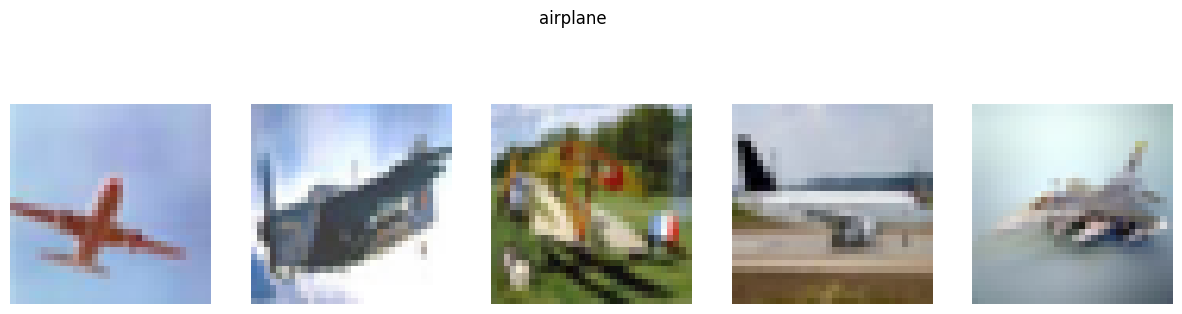

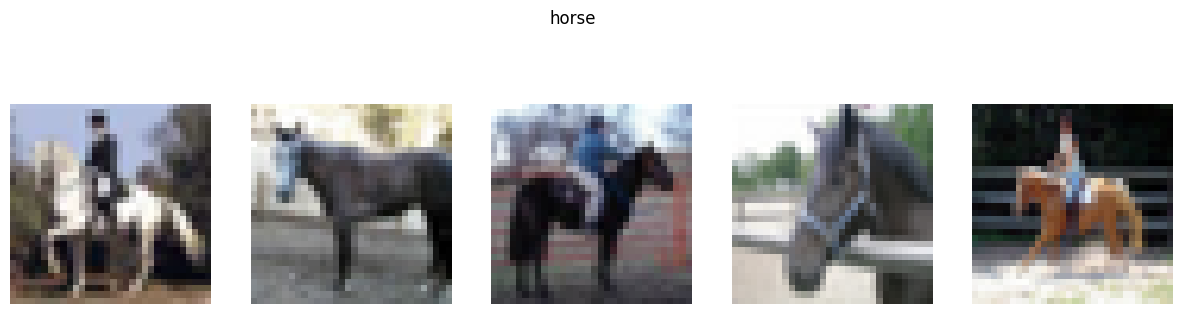

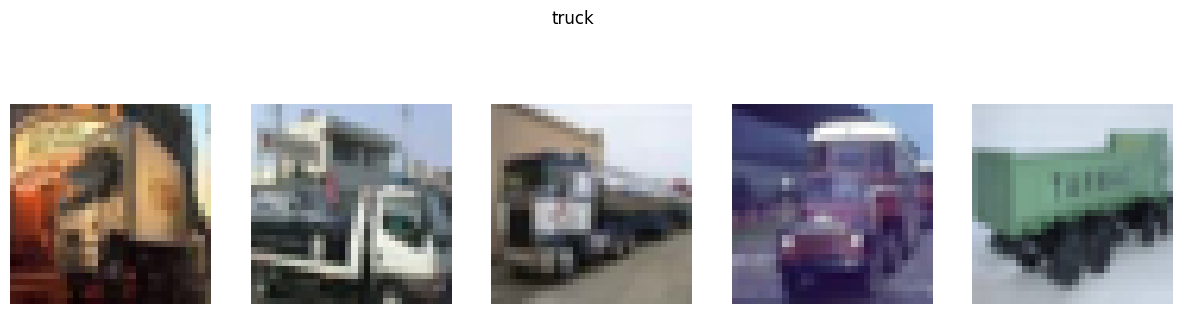

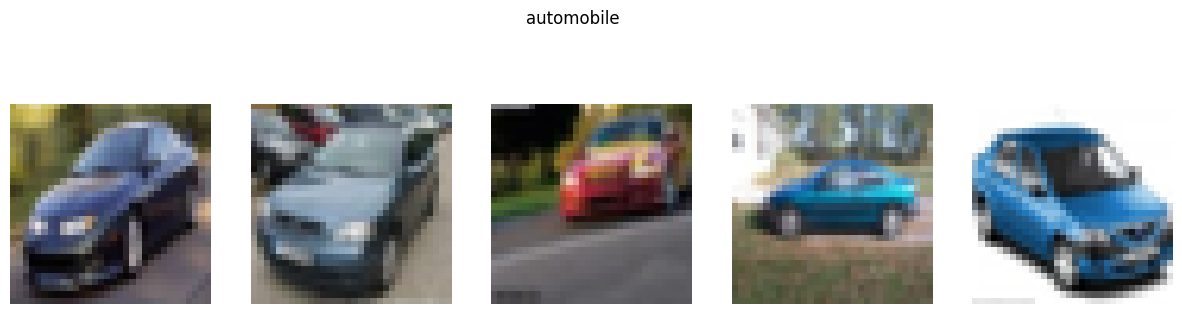

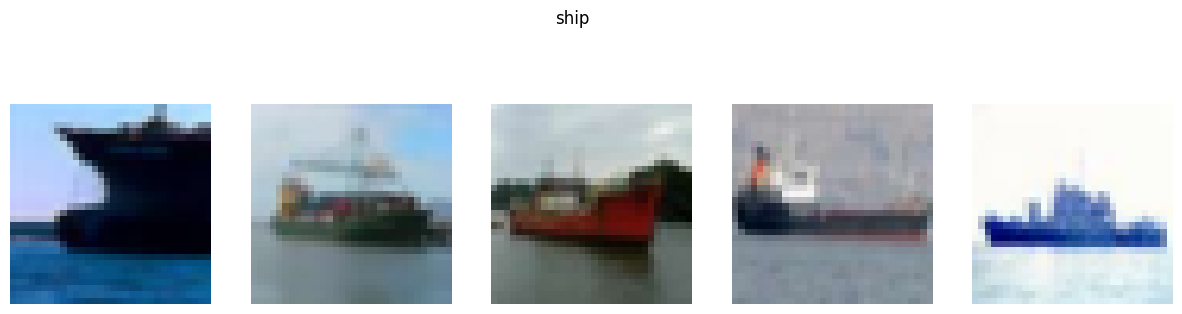

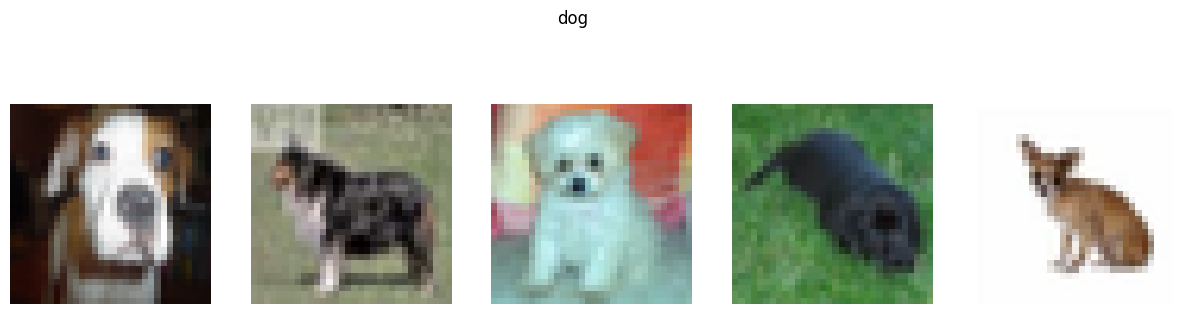

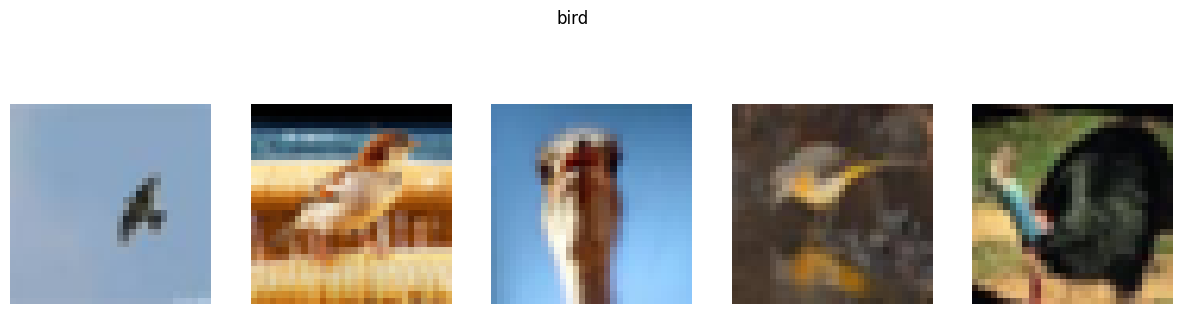

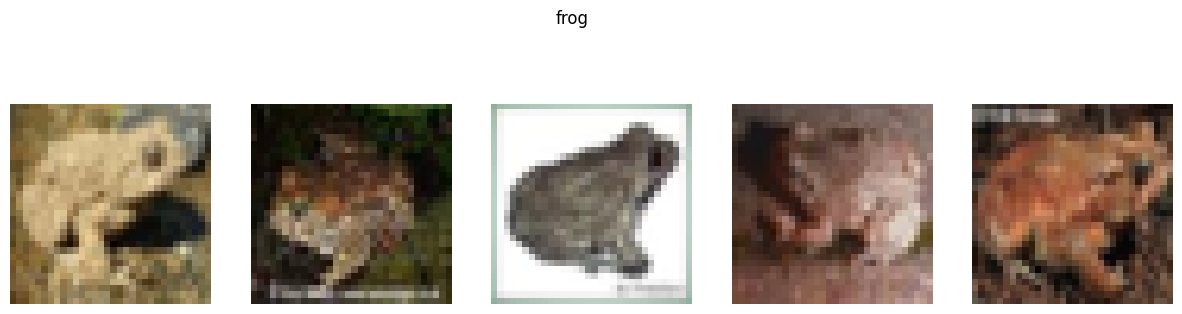

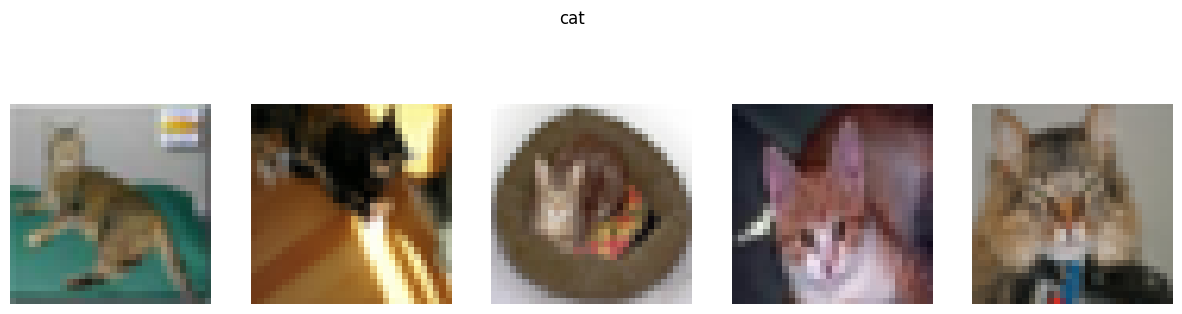

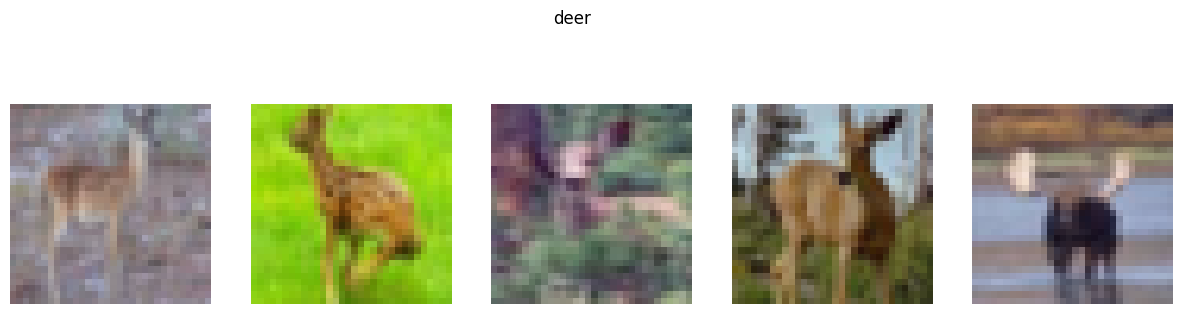

In [ ]:
base_dir = r"/kaggle/input/cifar10-pngs-in-folders/cifar10/test"
classes = os.listdir(base_dir)
for j in classes:
    path = os.path.join(base_dir, j)
    images = os.listdir(path)
    plt.figure(figsize=(15,4))
    for index, img in enumerate(images[:5]):
        img_path = os.path.join(path, img)
        image = plt.imread(img_path)
        plt.suptitle(j)
        plt.subplot(1, 5, index + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()


In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = r"/kaggle/input/cifar10-pngs-in-folders/cifar10/train",
                                                                 labels = "inferred",
                                                                 batch_size = 32,
                                                                 image_size = (32,32))


val_data = tf.keras.preprocessing.image_dataset_from_directory(directory = r"/kaggle/input/cifar10-pngs-in-folders/cifar10/test",
                                                                 labels = "inferred",
                                                                 batch_size = 32,
                                                                 image_size = (32,32))

Found 50000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [ ]:
res = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for images, labels in train_data.take(1):
    print(images.shape)

for images, labels in val_data.take(1):
    print(images.shape)


(32, 32, 32, 3)
(32, 32, 32, 3)


In [ ]:
def normalize_(image,label):
    image=tf.cast(image/255.,tf.float32)
    return image,label

train_data=train_data.map(normalize_)
val_data=val_data.map(normalize_)

In [ ]:

model = Sequential()
# model.add(Input())
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(res)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(metrics=["accuracy"],loss="sparse_categorical_crossentropy",optimizer=RMSprop(learning_rate=2e-5))

In [ ]:
m=model.fit(train_data,epochs=6,validation_data=val_data)

Epoch 1/6


I0000 00:00:1721536311.191451      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721536311.283899      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.3688 - loss: 1.9114

W0000 00:00:1721536865.499968      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 657s 375ms/step - accuracy: 0.3688 - loss: 1.9112 - val_accuracy: 0.1067 - val_loss: 2.5276
Epoch 2/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 593s 348ms/step - accuracy: 0.7313 - loss: 0.9388 - val_accuracy: 0.9097 - val_loss: 0.3872
Epoch 3/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 555s 355ms/step - accuracy: 0.8355 - loss: 0.6591 - val_accuracy: 0.9303 - val_loss: 0.2943
Epoch 4/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 545s 349ms/step - accuracy: 0.8933 - loss: 0.4859 - val_accuracy: 0.9412 - val_loss: 0.2319
Epoch 5/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 545s 349ms/step - accuracy: 0.9258 - loss: 0.3656 - val_accuracy: 0.9473 - val_loss: 0.2072
Epoch 6/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 555s 355ms/step - accuracy: 0.9478 - loss: 0.2836 - val_accuracy: 0.9461 - val_loss: 0.2031


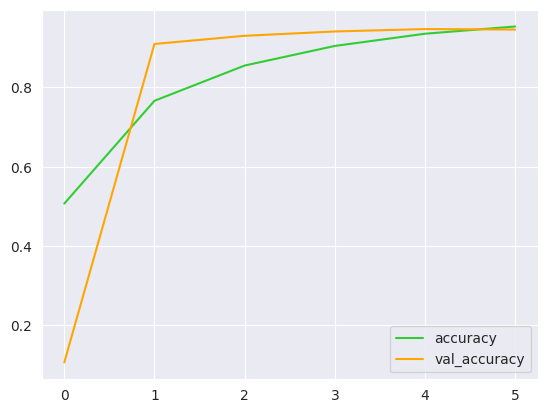

In [ ]:
sns.set_style("darkgrid")
plt.plot(m.history["accuracy"],color = "limegreen")
plt.plot(m.history["val_accuracy"],color = "orange")
plt.legend(["accuracy","val_accuracy"])

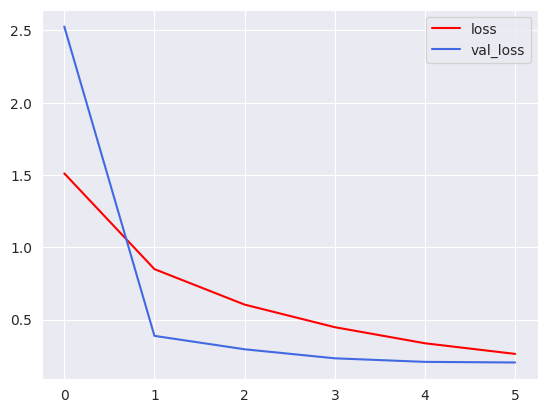

In [ ]:
sns.set_style("darkgrid")
plt.plot(m.history["loss"],color = "red")
plt.plot(m.history["val_loss"],color = "royalblue")
plt.legend(["loss","val_loss"])

In [ ]:
model.save("Classifier.h5")